In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

In [2]:
def h(z, a, b, w, t):
    return np.exp(-1j * a * z) * np.exp(-b * z) * np.exp(1j * w * t)

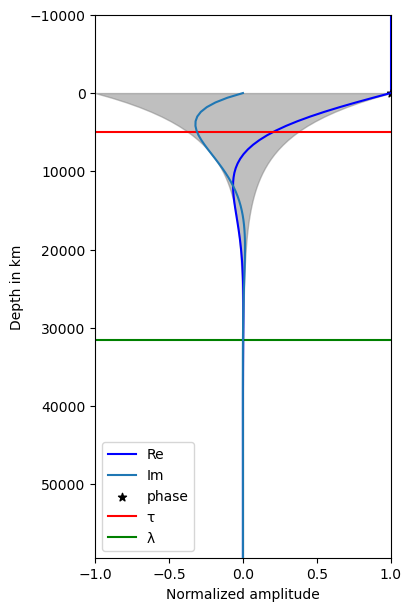

In [3]:

T = 1.0  # Assuming T is defined somewhere in your code
w = 2 * np.pi / T 
sigma = 1e-2
mu = np.pi * 4e-7

kk = np.sqrt(w * mu * sigma / 2)
a = kk  # Assuming a is defined somewhere in your code
b = kk  # Assuming b is defined somewhere in your code
zair = np.arange(start=-10000, stop=0, step=100)
zz = np.arange(start=0, stop=6e4, step=600)
tau = 1.0 / kk

fig, ax = plt.subplots(figsize=(4, 6), layout='constrained')

def update(frame):
    ax.clear()
    t = frame * T / 100.0
    ax.plot([np.real(np.exp(1j * w * t)) for _ in zair], zair, color='blue', label='', zorder=1)
    ax.plot([np.real(h(z, a, b, w, t)) for z in zz], zz, color='blue', label='Re', zorder=2)
    ax.plot([np.imag(h(z, a, b, w, t)) for z in zz], zz, label='Im', zorder=3)
    ax.fill_betweenx(zz, -np.exp(-b * zz), np.exp(-b * zz), color='grey', alpha=0.5, label='')
    # ax.fill_betweenx(zz, np.min(zair), 0, color='lightblue', alpha=0.2, label='Air')
    # ax.fill_betweenx(zz, 0, np.max(zz), color='brown', alpha=0.2, label='Earth')
    zp = w * t / a if a > 0.0 else np.max(zz) + w * t / a
    ax.scatter(np.real(h(zp, a, b, w, t)), zp, marker='*', color='black', label='phase')
    ax.axhline(y=tau, color='red', label='τ')
    ax.axhline(y=2 * np.pi * tau, color='green', label='λ')
    ax.set_ylabel('Depth in km')
    ax.set_xlabel('Normalized amplitude')
    ax.set_xlim(-1.0, 1.0)
    ax.set_ylim(min(zair), max(zz))
    ax.invert_yaxis()
    ax.legend(loc='lower left')

ani = FuncAnimation(fig, update, frames=100, interval=50)



In [4]:
ani.save('ani.gif')